# **Titanic Survival Prediction**

**Problem Statement:**
It predicts weather the person survived from the titanic sink or not

**Observation:**
Classification Problem

## IMPORTING LIBRARIES

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## IMPORTING THE DATASET

In [2]:
# Importing training data

train = pd.read_csv("/kaggle/input/titanic/train.csv")

# Importing test data

test = pd.read_csv("/kaggle/input/titanic/test.csv")

## UNDERSTANDING THE DATASET

Did not survive --> 0

survived --> 1

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Observation:** We can observe that passengerid, name, ticket columns are not that much useful for our prediction

In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
test.shape

(418, 11)

In [7]:
# Checking for Data Formats

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Observation:** 

Categorical Data:
1. Name
2. Sex
3. Ticket
4. Cabin
5. Embarked

Numerical Data:
1. PassengerId
2. Survived
3. Pclass
4. Age
5. SibSp
6. Parch
7. Fare

In [8]:
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

**Observation:**

0 --> The passenger did not survive (died)

1 --> The passenger survived

**Observations:** They are not so much unevenly distributed

## EDA

### Univariate Analysis

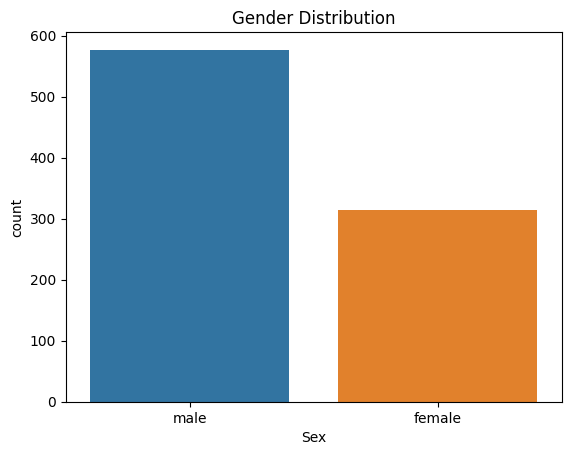

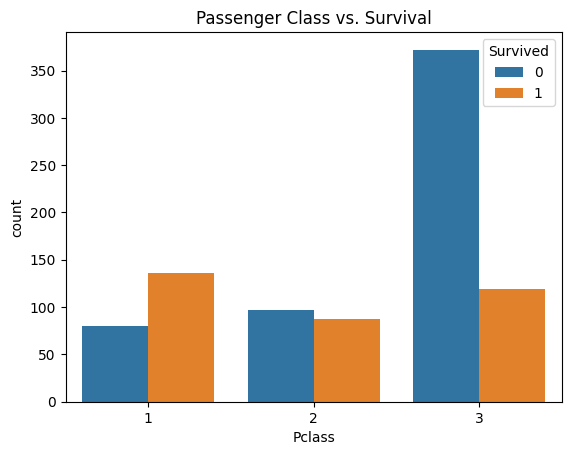

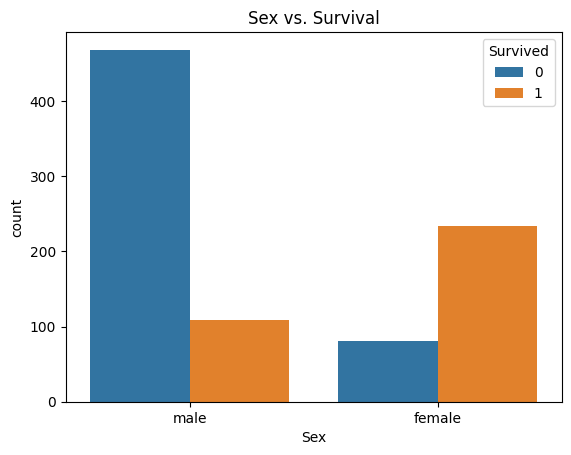

In [9]:
#Understanding Categorical Variables 

# Count plot for 'Sex'
sns.countplot(x='Sex', data=train)
plt.title('Gender Distribution')
plt.show()

# Count plot for 'Pclass' (Passenger Class) vs. Survival
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('Passenger Class vs. Survival')
plt.show()

# Count plot for 'Sex' vs. Survival
sns.countplot(x='Sex', hue='Survived', data=train)
plt.title('Sex vs. Survival')
plt.show()

**Observation:** As we can see, the death rate of Passenger class 3 is way too higher than the top class people

Also Females were highly saved and majority of the men died

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


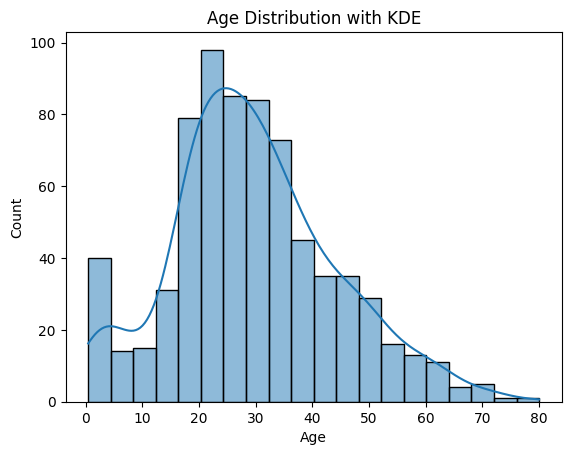

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


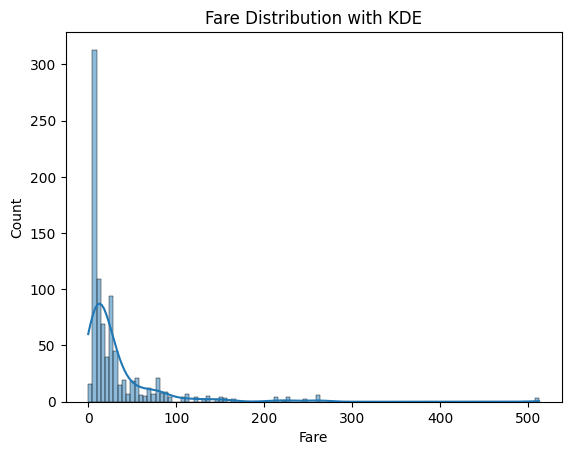

In [10]:
#Distribution of Numerical Variables 

# Distribution of 'Age'
sns.histplot(train['Age'].dropna(), kde=True)
plt.title('Age Distribution with KDE')
plt.show()

# Distribution of 'Fare'
sns.histplot(train['Fare'], kde=True)
plt.title('Fare Distribution with KDE')
plt.show()

**Observation:** age mainly ranges between 15-38

**Observation:** Fare is right skewed distribution

### Handling Right-Skewed distribution in fare column

Using **'Log Transformation'** 

Reduces Skewness: It compresses the range of values, reducing the effect of large fares while maintaining the relative order of values.

In [11]:
train['Fare_log'] = np.log1p(train['Fare'])  # log1p is used to handle zero values as well

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


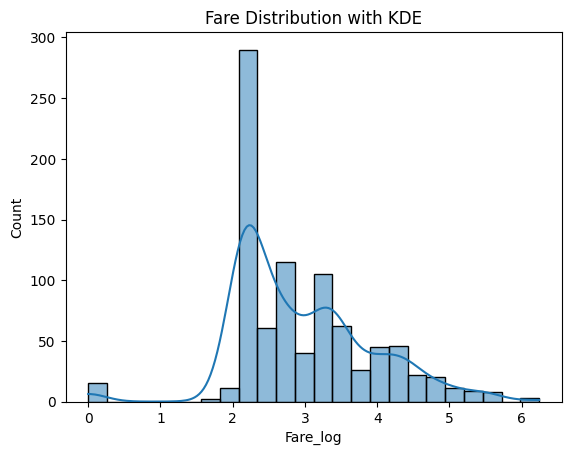

In [12]:
# Distribution of 'Fare'
sns.histplot(train['Fare_log'], kde=True)
plt.title('Fare Distribution with KDE')
plt.show()

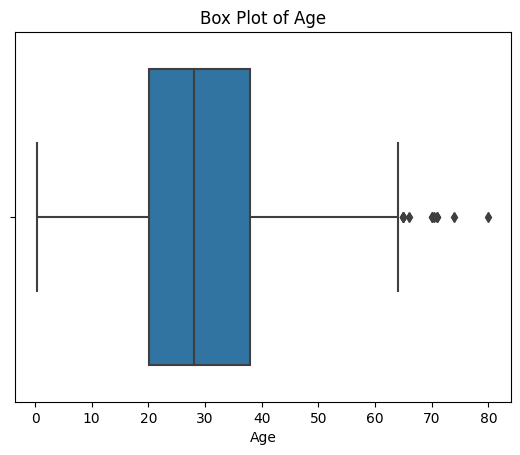

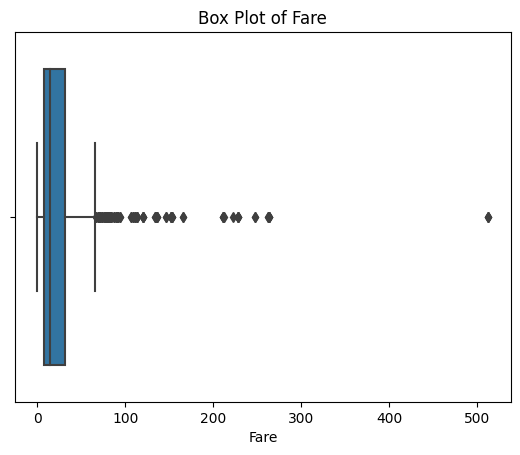

In [13]:
#Identifying Outliers

# Box plot for 'Age' to check for outliers
sns.boxplot(x=train['Age'])
plt.title('Box Plot of Age')
plt.show()

# Box plot for 'Fare' to check for outliers
sns.boxplot(x=train['Fare'])
plt.title('Box Plot of Fare')
plt.show()

**Observation:** since the fare has outliers but it will contribute mainly be telling which people paid high as it directly relates 1st class passengers we have handled it by log transformation but we are not going to remove that

**Observation:** Age: Outliers in the age column are less frequent, but these might also be relevant to survival chances. Rather than removing outliers, we can categorize age into bins, but you might not need to remove extreme ages unless they look unrealistic.

In [14]:
train['Age_binned'] = pd.cut(train['Age'], bins=[0, 12, 18, 35, 60, 80], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

In [15]:
train.drop(['Age'], axis = 1, inplace = True)

In [16]:
train.drop(['Fare'], axis=1, inplace = True)

In [17]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked,Fare_log,Age_binned
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,NaN,S,2.110213,Young Adult


### Bi-Variate

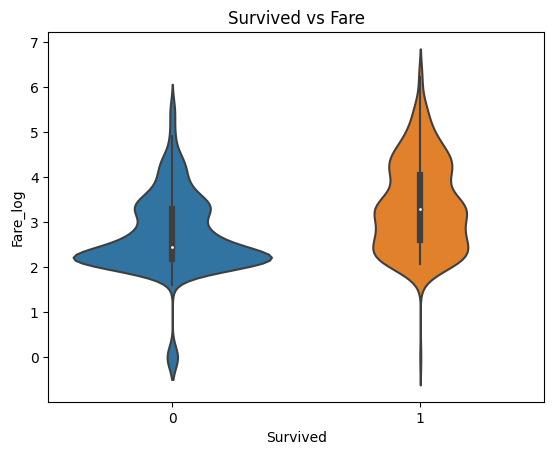

In [18]:
# Violin plot for 'Fare' vs. 'Survived'
sns.violinplot(x='Survived', y='Fare_log', data=train)
plt.title('Survived vs Fare')
plt.show()

**Observation:** by this we can observe that High fared (1st class) passengers survied but low fared died

## EDA on Test data

<Axes: xlabel='Fare'>

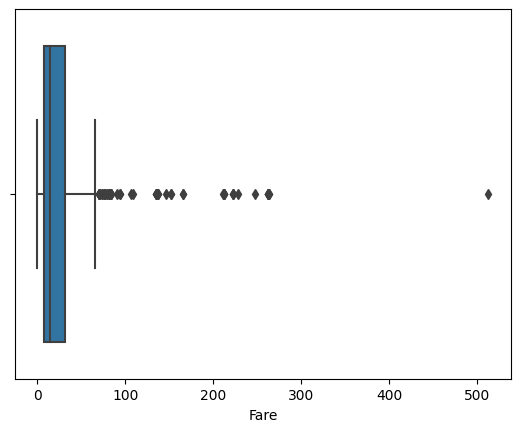

In [19]:
sns.boxplot(x=test['Fare'])

In [20]:
test['Fare_log'] = np.log1p(test['Fare'])  # log1p handles zero values too

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Fare_log'>

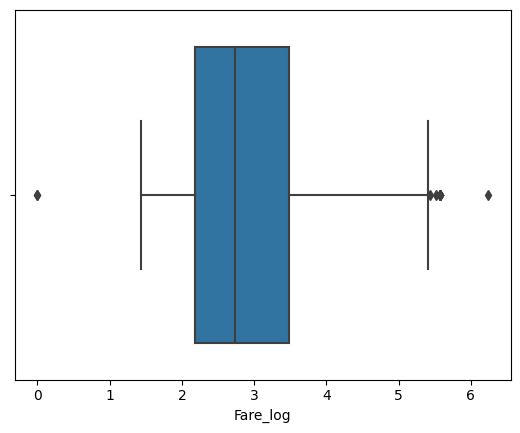

In [21]:
sns.boxplot(x=test['Fare_log'])

In [22]:
test.drop(['Fare'], axis=1, inplace = True)

In [23]:
test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,Fare_log
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,NaN,Q,2.178064


In [24]:
test['Age_binned'] = pd.cut(test['Age'], bins=[0, 12, 18, 35, 60, 80], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

In [25]:
test.drop(['Age'], axis = 1, inplace = True)

In [26]:
test.head(1)

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked,Fare_log,Age_binned
0,892,3,"Kelly, Mr. James",male,0,0,330911,NaN,Q,2.178064,Young Adult


## DATA PRE-PROCESSING

In [27]:
# Checking for duplicates

train.duplicated().sum()

0

In [28]:
# Removing unwanted columns

train.drop(['PassengerId','Name','Ticket'], axis = 1, inplace = True)

test.drop(['PassengerId','Name','Ticket'], axis = 1, inplace = True)

In [29]:
# Checking for missing values

train.isnull().sum()

Survived        0
Pclass          0
Sex             0
SibSp           0
Parch           0
Cabin         687
Embarked        2
Fare_log        0
Age_binned    177
dtype: int64

**Observation:** In missing features 'Age' is numerical and 'Cabin', 'Embarked' are categorical
so, we will use 

In [30]:
#Handling Categorical missing values with the median imputation methord

train['Age_binned'] = train['Age_binned'].fillna(train['Age_binned'].mode()[0])

In [31]:
# Checking for missing values

train['Age_binned'].isnull().sum()

0

In [32]:
#Handling categorical column 'Embarked' by mode imputation methord 

train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)  #Since .mode() returns a Series (even if there is only one mode), [0] is used to access the first mode value from that Series.

<ipython-input-32-91a54f157e64>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)  #Since .mode() returns a Series (even if there is only one mode), [0] is used to access the first mode value from that Series.


In [33]:
#checking for missing values

train['Embarked'].isnull().sum()

0

**Observation:** Since the Cabin class has high no of missing values, and we require it, and as we can analyze that it has relationship with Pclass we will 1st take the cabin value(deck) and analyze wrt pclass to impute cabin missing values

In [34]:
train['Deck'] = train['Cabin'].str[0]

In [35]:
train.groupby('Pclass')['Deck'].value_counts()

Pclass  Deck
1       C       59
        B       47
        D       29
        E       25
        A       15
        T        1
2       F        8
        D        4
        E        4
3       F        5
        G        4
        E        3
Name: count, dtype: int64

In [36]:
train['Deck'] = train.groupby('Pclass')['Deck'].transform(lambda x:x.fillna(x.mode()[0]))

In [37]:
train['Deck'].isnull().sum()

0

In [38]:
train.drop(['Cabin'], axis = 1, inplace = True)

In [39]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Fare_log,Age_binned,Deck
0,0,3,male,1,0,S,2.110213,Young Adult,F
1,1,1,female,1,0,C,4.280593,Adult,C
2,1,3,female,0,0,S,2.188856,Young Adult,F
3,1,1,female,1,0,S,3.990834,Young Adult,C
4,0,3,male,0,0,S,2.202765,Young Adult,F


In [40]:
# Missing values in test data

test.isnull().sum()

Pclass          0
Sex             0
SibSp           0
Parch           0
Cabin         327
Embarked        0
Fare_log        1
Age_binned     86
dtype: int64

In [41]:
# Handling Age column

test['Age_binned'] = test['Age_binned'].fillna(test['Age_binned'].mode()[0])

In [42]:
test['Age_binned'].isnull().sum()

0

In [43]:
# Handling fare missing values

median_fare = test.groupby(['Pclass','Embarked'])['Fare_log'].median()

In [44]:
test['Fare_log'] = test.apply(
    lambda row: median_fare[row['Pclass'], row['Embarked']] if pd.isnull(row['Fare_log']) else row['Fare_log'],
    axis=1
)

In [45]:
test['Fare_log'].isnull().sum()

0

In [46]:
#Handling the Cabin column

test['Deck'] = test['Cabin'].str[0]

In [47]:
test.groupby('Pclass')['Deck'].value_counts()

Pclass  Deck
1       C       35
        B       18
        D       11
        E        9
        A        7
2       F        5
        D        2
3       F        3
        G        1
Name: count, dtype: int64

In [48]:
test['Deck'] = test.groupby('Pclass')['Deck'].transform(lambda x: x.fillna(x.mode()[0]))

In [49]:
test['Deck'].isnull().sum()

0

In [50]:
test.drop('Cabin', axis=1, inplace=True)

In [51]:
test.head()

,Pclass,Sex,SibSp,Parch,Embarked,Fare_log,Age_binned,Deck
0,3,male,0,0,Q,2.178064,Young Adult,F
1,3,female,1,0,S,2.079442,Adult,F
2,2,male,0,0,Q,2.369075,Senior,F
3,3,male,0,0,S,2.268252,Young Adult,F
4,3,female,1,1,S,2.586824,Young Adult,F


In [52]:
# comfirming there are no more missing values

train.isnull().sum()

Survived      0
Pclass        0
Sex           0
SibSp         0
Parch         0
Embarked      0
Fare_log      0
Age_binned    0
Deck          0
dtype: int64

In [53]:
test.isnull().sum()

Pclass        0
Sex           0
SibSp         0
Parch         0
Embarked      0
Fare_log      0
Age_binned    0
Deck          0
dtype: int64

## TRAIN TEST SPLIT

In [54]:
X_train = train.drop(columns=['Survived']) 
y_train = train['Survived']

In [55]:
X_test = test

## DATA TRANSFORMATION

### Encoding categorical variables

### Categorical variables
1. Sex
2. Embarked
3. Deck
4. Age Binned

In [56]:
X_train.head(1)

,Pclass,Sex,SibSp,Parch,Embarked,Fare_log,Age_binned,Deck
0,3,male,1,0,S,2.110213,Young Adult,F


In [57]:
X_test.head(1)

,Pclass,Sex,SibSp,Parch,Embarked,Fare_log,Age_binned,Deck
0,3,male,0,0,Q,2.178064,Young Adult,F


In [58]:
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns for encoding (e.g., 'Embarked', 'Sex')
categorical_columns = ['Embarked', 'Sex', 'Age_binned', 'Deck']  

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit the encoder on the training features' categorical columns
X_train_encoded = encoder.fit_transform(X_train[categorical_columns])

# Apply the same encoder to the test features
X_test_encoded = encoder.transform(X_test[categorical_columns])

# Convert the encoded arrays back to DataFrames and add to the original data
# Training set
encoded_train_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_columns))
X_train = X_train.reset_index(drop=True)  # To match the index before concatenating
X_train = pd.concat([X_train.drop(columns=categorical_columns), encoded_train_df], axis=1)

# Test set
encoded_test_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_columns))
X_test = X_test.reset_index(drop=True)  # To match the index before concatenating
X_test = pd.concat([X_test.drop(columns=categorical_columns), encoded_test_df], axis=1)

# Now X_train and X_test are fully encoded and ready for model training and predictions


In [59]:
X_train.head(1)

,Pclass,SibSp,Parch,Fare_log,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Age_binned_Adult,...,Age_binned_Teen,Age_binned_Young Adult,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,3,1,0,2.110213,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [60]:
X_test.head(1)

,Pclass,SibSp,Parch,Fare_log,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Age_binned_Adult,...,Age_binned_Teen,Age_binned_Young Adult,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,3,0,0,2.178064,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## FEATURE SCALING

In [61]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data 
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Now X_train_scaled and X_test_scaled are scaled versions of your features

## CROSS VALIDATION

## MODEL BUILDING

In [62]:
# LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Initialize the model
lr_model = LogisticRegression()

# Perform 5-fold cross-validation on the training set
cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print(f"Logistic Regression - Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Logistic Regression - Mean CV Accuracy: {cv_scores.mean()}")

# Train on full training data
lr_model.fit(X_train, y_train)

# Make predictions on the test set
lr_test_predictions = lr_model.predict(X_test)

Logistic Regression - Cross-Validation Accuracy Scores: [0.78212291 0.80337079 0.78089888 0.7752809  0.81460674]
Logistic Regression - Mean CV Accuracy: 0.7912560416797438


In [63]:
# RANDOM FOREST CLASSIFIER

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Initialize your model
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)

# Perform 5-fold cross-validation on the training set
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean()}")

# Train on full training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_test_predictions = rf_model.predict(X_test)

Cross-Validation Accuracy Scores: [0.79329609 0.76966292 0.85955056 0.79775281 0.8258427 ]
Mean CV Accuracy: 0.8092210156299039


In [64]:
# DECISION TREE CLASSIFIER

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Initialize the model
dt_model = DecisionTreeClassifier()

# Perform 5-fold cross-validation on the training set
cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print(f"Decision Tree - Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Decision Tree - Mean CV Accuracy: {cv_scores.mean()}")

# Train on full training data
dt_model.fit(X_train, y_train)

# Make predictions on the test set
dt_test_predictions = dt_model.predict(X_test)

Decision Tree - Cross-Validation Accuracy Scores: [0.81564246 0.78651685 0.80898876 0.79213483 0.83146067]
Decision Tree - Mean CV Accuracy: 0.8069487163392128


In [65]:
# SVM

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Initialize the model
svm_model = SVC()

# Perform 5-fold cross-validation on the training set
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print(f"SVM - Cross-Validation Accuracy Scores: {cv_scores}")
print(f"SVM - Mean CV Accuracy: {cv_scores.mean()}")

# Train on full training data
svm_model.fit(X_train, y_train)

# Make predictions on the test set
svm_test_predictions = svm_model.predict(X_test)

SVM - Cross-Validation Accuracy Scores: [0.82681564 0.8258427  0.81460674 0.79775281 0.83707865]
SVM - Mean CV Accuracy: 0.8204193082669009


In [66]:
# K-NEAREST-NEIGHBORS

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Initialize the model
knn_model = KNeighborsClassifier()

# Perform 5-fold cross-validation on the training set
cv_scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print(f"KNN - Cross-Validation Accuracy Scores: {cv_scores}")
print(f"KNN - Mean CV Accuracy: {cv_scores.mean()}")

# Train on full training data
knn_model.fit(X_train, y_train)

# Make predictions on the test set
knn_test_predictions = knn_model.predict(X_test)

KNN - Cross-Validation Accuracy Scores: [0.74860335 0.7752809  0.83707865 0.80337079 0.8258427 ]
KNN - Mean CV Accuracy: 0.7980352771326344


In [67]:
# GRADIENT BOOSTING

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

# Initialize the model
gb_model = GradientBoostingClassifier()

# Perform 5-fold cross-validation on the training set
cv_scores = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print(f"Gradient Boosting - Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Gradient Boosting - Mean CV Accuracy: {cv_scores.mean()}")

# Train on full training data
gb_model.fit(X_train, y_train)

# Make predictions on the test set
gb_test_predictions = gb_model.predict(X_test)

Gradient Boosting - Cross-Validation Accuracy Scores: [0.79329609 0.80337079 0.84269663 0.7752809  0.85393258]
Gradient Boosting - Mean CV Accuracy: 0.8137153976523759


In [68]:
# XG BOOST CLASSIFIER

from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# Initialize the model
xgb_model = XGBClassifier()

# Perform 5-fold cross-validation on the training set
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print(f"XGBoost - Cross-Validation Accuracy Scores: {cv_scores}")
print(f"XGBoost - Mean CV Accuracy: {cv_scores.mean()}")

# Train on full training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
xgb_test_predictions = xgb_model.predict(X_test)

XGBoost - Cross-Validation Accuracy Scores: [0.78212291 0.81460674 0.8258427  0.79213483 0.85955056]
XGBoost - Mean CV Accuracy: 0.8148515472977215


**Observation:** Highest accuracy given model: SVM = 82.04%

and lowest being: Logistic Regression = 79.12%

## HYPERPARAMETER TUNING

In [69]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

# Initialize the SVC model
svc_model = SVC(random_state=42)

# Define the hyperparameter space
param_dist = {
    'C': np.logspace(-3, 2, 6),  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel types
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'degree': [2, 3, 4, 5],  # Degree for 'poly' kernel
    'tol': [1e-3, 1e-4, 1e-5]  # Tolerance for stopping criterion
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=svc_model, param_distributions=param_dist,
                                   n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit the randomized search model
random_search.fit(X_train, y_train)

# Get the best hyperparameters
print(f"Best Hyperparameters: {random_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {random_search.best_score_}")

# Train the model with the best hyperparameters
best_svc_model = random_search.best_estimator_

# Make predictions on the test set
test_predictions = best_svc_model.predict(X_test)

Best Hyperparameters: {'tol': 0.001, 'kernel': 'poly', 'gamma': 'auto', 'degree': 2, 'C': 100.0}
Best Cross-Validation Accuracy: 0.8271734354403366


**Observation:** SVM after Hyperparamter tuning = 82.71%

# PREPARING SUBMISSION FILE

In [70]:
# Reload only the PassengerId column from the test dataset
passenger_ids = pd.read_csv('/kaggle/input/titanic/test.csv', usecols=['PassengerId'])

In [71]:
# After predicting on the test data
svm_test_predictions = svm_model.predict(X_test) 

# Create the submission file
submission = pd.DataFrame({
    'PassengerId': passenger_ids['PassengerId'],
    'Survived': svm_test_predictions  
})

# Save the submission file as CSV
submission.to_csv('submission.csv', index=False)